In [1]:
import konlpy.tag
import re
import pickle

%matplotlib inline

In [3]:
# http://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010083362&date=20180514&type=1&rankingSectionId=100&rankingSeq=4
filename = r"C:\Users\samsung\Desktop\강의 등\빅데이터 청년인재\프로젝트\크롤링\NaverBlog_{}.txt".format(input("키워드:"))
with open(filename, 'r', encoding='utf8') as f:
    content = f.read()

키워드:고흥 여행


In [4]:
# Text cleaning
filtered_content = re.sub(r'[^\d\s\w]',' ', content)

In [5]:
# 일부분만 일단 보기.
print(filtered_content[:500])

 고흥 남포미술관 가는 길  과역면 들길을 지나간다  소나기 지나가고 햇빛이 쨍쨍하다  또 소나기 지나가고 햇빛이 쨍쨍하다  들판에서 뜻밖의 행운을 만났다  산에 무지개가 걸렸다  들판은 추석이 멀지 않았다고 푸릇하다  산은 비구름을 걷어 내고 있다  비 갠 뒤 하늘도 참 맑다  바람도 구름도 가을로 가는 중이다  남포미술관 표석을 지나 학교에 등교하는 기분으로 교문을 지난다  가지런하고 잘 정돈되어 있다  주인의 부지런함이 보인다  꽃밭 단장이 한창이다  남포미술관을 후원하시는 분들과 자원봉사자들이다  미술관을 만들어가는 분들이다  옛 모습을 간직하고 있는 학교 운동장은 미술관 마당이 되었고  하얀 사각의 투박한 옛 학교건물은 꽃과 나무들과 함께 어울려 미술관이 되었다  꽃구경이 쉽지 않은 마당에 꽃들이 가득하다  연못과 연꽃과 꽃들과 하담정 荷潭停 은 다정한 가족 같다  보는 것만으로도 휴식이다  꽃들이 마당으로 나간다  마당을 다 차지할 태세다  미술관을 들어서자 작은 소품들이


### ㅋㅋ, ㅎㅎ 등 자음 제거 필요

In [5]:
# Twitter has changed to Okt since 0.4.5
twitter = konlpy.tag.Twitter()
twitter_morphs = twitter.pos(filtered_content)
print(twitter_morphs)

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate

### Komoran은 에러떠서 일단 주석처리함

In [33]:
#komoran = konlpy.tag.Komoran()
#komoran_morphs = komoran.pos(filtered_content)
#print(komoran_morphs)

In [7]:
Noun_words = []
for word, pos in twitter_morphs:
    if pos == 'Noun':
        Noun_words.append(word)
#print(Noun_words)

Adj_words = []
for word, pos in twitter_morphs:
    if pos == 'Adjective':
        Adj_words.append(word)
        
Verb_words = []
for word, pos in twitter_morphs:
    if pos == 'Verb':
        Verb_words.append(word)

### 불용어 사전 정의해야함

In [8]:
# 불용어 제거를 위한 별도의 사전 (list 변수) 구축
# Noun(명사) 길이가 2글자 이상인 것만 포함
stopwords = ['연합뉴스', '서울', '기자','오늘','크기','현재','전북','생각','마음','자리','공간',
             '겨울','건물','명칭','선생','모습','사람','권역', '연합뉴스', '서울', '기자', '여행', 
             '중고차', '정말', '우리', '여기', '도착', '출발', '진짜', '다시', '그냥', '정도', 
             '역시', '조금', '이제', '완전', '뭔가', '제일', '약간', '중고', '매물', '허위', '매매', '시세',
            '직거래', '사이트', '직거래 사이트', '할부', '전액 할부', '수원', '할부 이자율', '이자', '그랜드',
            '스타렉스', '카니발', '소렌토', '보배드림', '엔카', '아반떼', '탑차', '코란도', '포르테', '입찰', '홈페이지',
            '강릉', '속초', '오토', '부천', '고양', '일산', '울산', '평창', '삼척', '가평', '포스팅', '블친님들',
             '곡성'
            ]
unique_Noun_words = set(Noun_words)
for word in unique_Noun_words:
    if (word in stopwords) or (len(word)<2):
        while word in Noun_words: Noun_words.remove(word)
            
unique_Adj_words = set(Adj_words)
for word in unique_Adj_words:
    if (word in stopwords) or (len(word)<2):
        while word in Adj_words: Adj_words.remove(word)
                        
unique_Verb_words = set(Verb_words)
for word in unique_Verb_words:
    if (word in stopwords) or (len(word)<2):
        while word in Verb_words: Verb_words.remove(word)

In [9]:
곡성 = Noun_words + Adj_words

In [10]:
from collections import Counter
c = Counter(곡성) # input type should be a list of words (or tokens)
print(c)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

Counter({'번지': 4406, '맛집': 1185, '식당': 1023, '전국': 926, '출구': 746, '골목': 676, '구이': 545, '마을': 538, '위치': 518, '전남': 494, '방향': 458, '시장': 415, '요리': 381, '있는': 354, '빌딩': 335, '있다': 335, '회관': 332, '낙지': 325, '갈비': 315, '호선': 307, '횟집': 300, '입구': 277, '돼지': 275, '직진': 274, '바로': 269, '사거리': 269, '문화': 260, '센터': 255, '한정식': 251, '광주': 250, '매운탕': 234, '관광': 233, '불고기': 233, '호텔': 228, '전통': 224, '교육': 216, '추천': 212, '향남': 205, '운영': 202, '비빔밥': 201, '근처': 200, '냉면': 200, '축제': 197, '지하철': 197, '맞은편': 194, '입니다': 193, '군수': 191, '거리': 190, '전라남도': 182, '좌회전': 176, '백반': 176, '삼겹살': 176, '해물': 176, '사업': 173, '우회': 172, '장어': 169, '곡성군': 167, '순천': 167, '칼국수': 166, '보고': 165, '두부': 164, '공원': 159, '음식': 156, '방면': 156, '기획': 156, '회의실': 156, '복지': 155, '우측': 154, '주민': 152, '숯불': 146, '지역': 145, '건너편': 145, '정문': 144, '보성': 144, '고기': 143, '전골': 143, '터미널': 141, '회의': 140, '정식': 139, '지하': 136, '시간': 135, '섬진강': 134, '국수': 134, '오른쪽': 133, '부산': 133, '추어탕': 128, '가든': 127, '김치': 126, 

In [11]:
# 빈도분석 결과 pickle 파일로 저장

import pickle
f = open('곡성 석곡식당.pickle', 'wb')
pickle.dump(c, f)
f.close()
quit()

# 토픽모델링!!!

In [1]:
# 토픽모델링에 적용할 수 있는 파일 형태로 만들기

with open(r"C:\Users\samsung\Desktop\강의 등\빅데이터 청년인재\프로젝트\크롤링\NaverBlog_{}.txt".format(input("키워드:")), encoding='utf8') as infile, \
        open(r"C:\Users\samsung\Desktop\강의 등\빅데이터 청년인재\프로젝트\크롤링\{}.csv".format(input("키워드:")), 'w', encoding='utf8') as outfile:
    for line in infile:
        outfile.write(line.replace('\t', ','))

infile.close()
outfile.close()

키워드:고흥 숙박
키워드:고흥 숙박


In [2]:
import pandas as pd
곡성 = pd.read_csv(r"C:\Users\samsung\Desktop\강의 등\빅데이터 청년인재\프로젝트\크롤링\{}.csv".format(input("키워드:")),
                 sep='delimiter', header=None, encoding = 'utf8')

키워드:고흥 숙박


C:\Users\samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
# 사전 추가
from ckonlpy.tag import Twitter
twitter = Twitter()

twitter.add_dictionary(['전남곡성', '전남', '바이크 투어', '죽동제', '강점기', '일제 강점기', 
                        '일제강점기', '기차마을', '기차 마을', '동태탕', '플리마켓', '순천만습지', 
                        '순천만 습지', '바이크투어', '데이트코스', '데이트 코스', '가족여행','조태일 시문학기념관', '조태일', '시문학기념관',
                       '곡성기차마을 전통시장', '전통시장', '곡성기차마을', '옥과전통시장', '석곡전통시장',
                       '옥과시장', '석곡시장', '광주 근교', '트릭아트', '트릭 아트', '트릭아트 뮤지엄',
                       '트릭 아트 뮤지엄', '트릭아트뮤지엄', '심청축제', '심청 축제', '곡성심청축제', 
                       '곡성 심청 축제', '세계장미축제', '곡성장미축제', '곡성 장미 축제', '장미 축제', '장미축제']\
                       + ['커피사관학교', '커피 사관학교', '우주발사전망대', '우주 발사 전망대'], 'Noun')
                        

twitter.add_dictionary(['가능하다', '아름답다', '맛있다', '다양하다', '추천', '좋아하다', '최고'], 'Positive', force = True)
twitter.add_dictionary(['힘들다', '어렵다', '비싸다', '싸우다', '아쉽다', '부담', '위험'], 'Negative', force = True)


C:\Users\samsung\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Users\samsung\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:
#news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
곡성['clean_doc'] = 곡성[0].str.replace("[^\d\s\w]", " ")
곡성['clean_doc2'] = ''


In [5]:
# 자음 제거 + 단어 성격에 따라 분리
for i in range(0, len(곡성['clean_doc'])):
    #twitter = Twitter()
    곡성['clean_doc2'][i] = ''
    for word, pos in twitter.pos(곡성['clean_doc'][i]):
        if (pos == 'Noun') | (pos == 'Adjective')   :
            곡성['clean_doc2'][i] += (' ' + word)

In [6]:
# 길이가 2 이하인 단어는 제거 (길이가 짧은 단어 제거)
곡성['clean_doc2'] = 곡성['clean_doc2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


In [7]:
# 불용어 제거 + tokenization

stop_words = ['연합뉴스', '서울', '기자','오늘','크기','현재','전북','생각','마음','자리','공간',
             '겨울','건물','명칭','선생','모습','사람','권역', '연합뉴스', '서울', '기자', '여행', 
             '중고차', '정말', '우리', '여기', '도착', '출발', '진짜', '다시', '그냥', '정도', 
             '역시', '조금', '이제', '완전', '뭔가', '제일', '약간', '중고', '매물', '허위', '매매', '시세',
            '직거래', '사이트', '직거래 사이트', '할부', '전액 할부', '수원', '할부 이자율', '이자', '그랜드',
            '스타렉스', '카니발', '소렌토', '보배드림', '엔카', '아반떼', '탑차', '코란도', '포르테', '입찰', '홈페이지',
            '강릉', '속초', '오토', '부천', '고양', '일산', '울산', '평창', '삼척', '가평', '포스팅', '블친님들',
              'https', 'com', '곡성', '입니다', '에요', '있습니다', '같아요', '곡성군', '곡성읍'
            ]\
            + ['고흥', '고흥군', '전라남도', '었습니', '고흥반도', '있는데', '있더라구요', '있다고', '있네요', '우리나라',
              '여러분', '블로그', '있었다', '관광지', '음으로', '전라도', '로부터', '마지막', '대한민국', '있었습니다',
              '같습니다', '있는데요', '있답니다', '있었는데', '있으니', '폐기물', '쓰레기']
tokenized_doc = 곡성['clean_doc2'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])


In [8]:
tokenized_doc

0      [이야기, 깔끔해, 워크샵, 이야기, 즐거웠, 워크샵, 테라스, 테라스, 좋더라구요...
1      [해수욕장, 사무실, 화장실, 해수욕장, 목적지, 해수욕장, 모래사장, 해수욕장, ...
2      [같다고, 물고기, 그림자, 바닷가, 컵라면, 부스러기, 주먹밥, 팥빙수, 소록도,...
3      [더워도, 더워도, 더워요, 어떻게, 물놀이, 수영장, 올망졸망, 물놀이, 해주시,...
4      [금산면, 거금도, 그대로, 거금도, 녹동항, 거금대교, 거금도, 레슬러, 곳곳이,...
5      [숙박시설, 오랜만, 페이지, 같았다, 에어컨, 수영장, 있다면, 아이템, 베란다,...
6      [부럽지, 한그루, 하우스, 마무리, 인테리어, 예뻤던, 고품격, 한그루, 하우스,...
7      [녹동항, 전문점, 두려움, 비린내가, 같았는데, 유자청, 개꿀맛, 알러지, 많아서...
8      [덥다고, 그림자, 참살이, 조가비, 과역면, 참살이, 한국말, 관광객, 세미나, ...
9      [바다낚시, 제대로, 바다낚시, 낚시꾼, 짜릿한, 갑오징어, 쭈꾸미, 바다낚시, 원...
10     [하이라이트, 미술관, 미술관, 선착장, 미술관, 바닷가, 미술관, 미술관, 골목길...
11     [느즈막, 녹동항, 귀차니즘, 더웠던, 올여름, 그랬던, 슬로우, 매니아, 아닙니다...
12     [전망대, 남양면, 동일면, 전망대, 프로그램, 트레킹, 오리엔티어링, 호랑이, 같...
13     [미술관, 에어컨, 좋다고, 한반도, 여행지, 자연환경, 아기자기, 볼거리, 많아서...
14     [깔끔한, 깨끗하게, 굉장히, 좋았다고, 좋다는, 이야기, 이야기, 좋아서, 그런지...
15                                                    []
16     [자연환경, 어둑해진, 매표소, 아스팔트, 콘크리트, 도로로, 가로등, 오르다, 오...
17     [해수욕장, 야영장, 게스트, 하우스, 서핑

In [9]:
# 몇 번째 단어가 몇 번 나오닝? 
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

C:\Users\samsung\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[(25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 6)]


In [10]:
# 본격 토픽 모델링

import gensim
NUM_TOPICS = 20 #n개의 토픽
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=20) # 각 토픽에 들어가는 단어 수 
#for topic in topics:
#    print(topic)

In [29]:
# pip install pyLDAvis

In [11]:
# 토픽 모델링 시각화 (메모리 주의!)

import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
# pyLDAvis.display(vis)

C:\Users\samsung\Anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
C:\Users\samsung\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [12]:
pyLDAvis.save_html(vis, '{}.html'.format(input('키워드:')))

키워드:고흥 숙박


In [37]:
# tf - idf 분석

model = Word2Vec(tokenized_doc, window=3, min_count=3, size=100)
#window => 보고자 하는 양쪽 단
#min_count => 전체 corpus에서 사용 빈도수가 min_count보다 낮은 단어 제외
#size => word vector의 크기
# https://radimrehurek.com/gensim/models/word2vec.html

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [7]:
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
# 단어 a와 b의 유사도 
cosine_similarity(model.wv['이정재'].reshape(1,-1),model.wv['이범수'].reshape(1,-1))

array([[0.7930002]], dtype=float32)

In [61]:
# 단어 a와 유사한 topn개 단어 출력

model.wv.similar_by_word('데이트',topn=30)

[('집들이', 0.9997496008872986),
 ('남대문', 0.9997292757034302),
 ('일본인', 0.9997121095657349),
 ('테이블', 0.999707043170929),
 ('조선시대', 0.9997042417526245),
 ('맛있다', 0.9996882677078247),
 ('지하도', 0.9996724128723145),
 ('엑기스', 0.9996631741523743),
 ('고구마', 0.9996548891067505),
 ('다이어트', 0.9996458292007446),
 ('저수지', 0.9996433258056641),
 ('감칠맛', 0.9996213316917419),
 ('약수터', 0.9996212720870972),
 ('부침개', 0.999619722366333),
 ('핸드폰', 0.9996071457862854),
 ('도깨비', 0.9996058940887451),
 ('막걸리', 0.9996055364608765),
 ('버스정류장', 0.999602198600769),
 ('세종대왕', 0.9995946288108826),
 ('스위스', 0.9995936751365662),
 ('문학관', 0.9995908737182617),
 ('핵무기', 0.999588131904602),
 ('쇠고기', 0.9995872974395752),
 ('정당화', 0.9995868802070618),
 ('월남쌈', 0.9995858073234558),
 ('송이버섯', 0.9995825290679932),
 ('자전거', 0.9995802640914917),
 ('토마토', 0.9995783567428589),
 ('동작구', 0.9995774030685425),
 ('토요일', 0.9995742440223694)]

In [12]:
model.wv.similar_by_word(u'재밌',topn=50)

C:\Users\Sang\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('재미있', 0.8970472812652588),
 ('재밌네', 0.8275203704833984),
 ('재밌어', 0.8213738203048706),
 ('재밋음', 0.804770827293396),
 ('재밌었', 0.7964779734611511),
 ('재밌는', 0.7383912801742554),
 ('재밋어', 0.7273887395858765),
 ('재미있었', 0.7153621912002563),
 ('재미있네', 0.7125424146652222),
 ('재밋네', 0.7055946588516235),
 ('잼남', 0.7040202021598816),
 ('재밌던', 0.6960337162017822),
 ('재미있어', 0.6890102028846741),
 ('재밌다', 0.6882636547088623),
 ('재밌더', 0.6878877282142639),
 ('재밋엇어', 0.6857227683067322),
 ('재밋', 0.6852385997772217),
 ('꿀잼', 0.6734797954559326),
 ('재밌고', 0.6578759551048279),
 ('재미있던', 0.6519865393638611),
 ('재밋었어', 0.651836097240448),
 ('재밌구', 0.6414423584938049),
 ('재미있는', 0.6399118900299072),
 ('재밋엇', 0.6339613199234009),
 ('잼', 0.609200656414032),
 ('재밌게', 0.6068774461746216),
 ('재밋엇음', 0.5971360802650452),
 ('재미있다', 0.5926587581634521),
 ('재밋습니', 0.5796632766723633),
 ('웃김', 0.5773693323135376),
 ('개꿀잼', 0.574456512928009),
 ('재밋었', 0.5729736089706421),
 ('존잼', 0.5679388046264648),
 ('재밋었음', 0

In [9]:
model.wv.similarity(u'이정재', u'이범수')

C:\Users\Sang\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.79300016

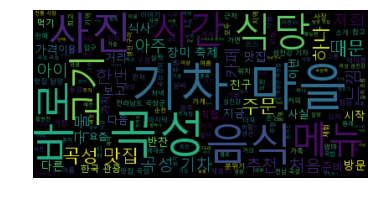

In [12]:
# 워드클라우드

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

noun_text = ''
for word in Noun_words:
    noun_text = noun_text +' '+word
    
wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate(noun_text) 
# generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()